In [8]:
import numpy as np
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C
import pandas as pd

/cvmfs/software.igwn.org/conda/envs/igwn-py310/lib/python3.10/site-packages/pandas/core/computation/expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.7.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


In [11]:
frg_r = pd.read_csv("../SN2024jlf/SN2024jlf_frg_r.csv")
frg_r

,Unnamed: 0,MJD,filter,unforced_mag,unforced_mag_error,unforced_mag_status,forced_ujy,forced_ujy_error
0,0,60530.217789,r,15.545,0.031,positive,NaN,NaN
1,4,60524.224201,r,15.413,0.041,positive,2563.0,11.6
2,5,60520.214849,r,15.389,0.026,positive,2706.6,10.7
3,8,60515.266620,r,15.363,0.028,positive,2729.7,14.7
4,10,60513.256863,r,15.361,0.028,positive,2706.4,14.1
5,12,60511.277639,r,15.348,0.027,positive,2729.4,19.2
6,14,60504.235567,r,15.315,0.031,positive,2961.4,12.8
7,15,60502.242616,r,15.274,0.037,positive,3094.8,12.2
8,16,60494.233854,r,15.262,0.034,positive,2991.3,10.6
9,18,60490.269016,r,15.246,0.035,positive,2942.8,10.7


In [16]:
X = frg_r[['MJD']].values
y = frg_r[['unforced_mag']].values

In [18]:
# Define kernel (e.g., Constant Kernel * RBF Kernel
kernel = C(1.0, (1e-3, 1e3)) * RBF(length_scale=1.0, length_scale_bounds=(1e-2, 1e2))

In [19]:
# Initialize Gaussian Process Regressor
gpr = GaussianProcessRegressor(kernel=kernel, random_state=42)

# Fit to the data
gpr.fit(X, y)

GaussianProcessRegressor(kernel=1**2 * RBF(length_scale=1), random_state=42)

In [20]:
# Predict with uncertainty
X_test = np.linspace(X.min(), X.max(), 1000).reshape(-1, 1) 
y_pred, sigma = gpr.predict(X_test, return_std=True)

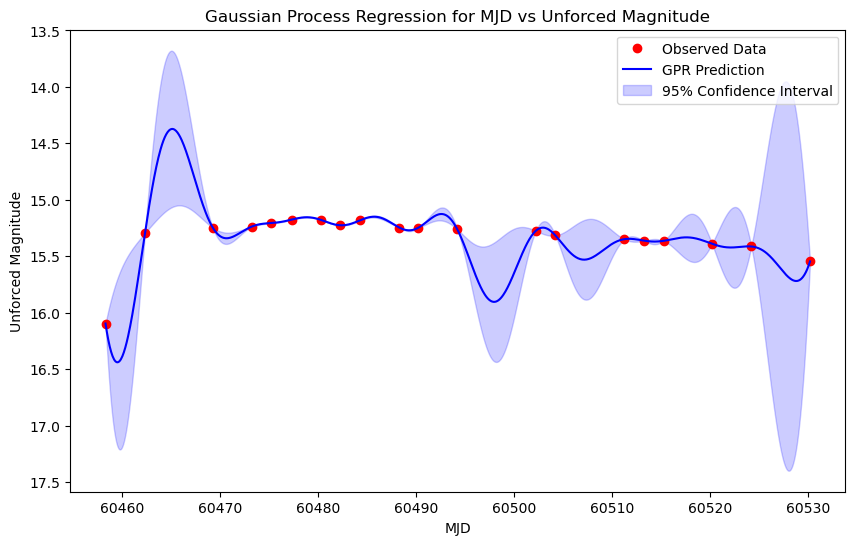

In [22]:
plt.figure(figsize=(10, 6))
plt.plot(X, y, 'ro', label="Observed Data")  # Original data points
plt.plot(X_test, y_pred, 'b-', label="GPR Prediction")  # Mean prediction
plt.fill_between(X_test.ravel(), y_pred - 1.96 * sigma, y_pred + 1.96 * sigma, color='blue', alpha=0.2, label="95% Confidence Interval")
plt.xlabel("MJD")
plt.ylabel("Unforced Magnitude")
plt.gca().invert_yaxis()
plt.title("Gaussian Process Regression for MJD vs Unforced Magnitude")
plt.legend()
plt.show()